                                        Mini Project - Python
                                        Topic - Loan Dataset

Introduction - Loans dataset aims to identify variables which indicate if a
person is likely to default, which can be used for identifying the risky loan
applicants to avoid any financial loss to the company.

Dataset Description - It contains the complete loan data for all loans
issued through the time period 2007 to 2011.

Data Dictionary -
1.annual_inc - The self-reported annual income provided by the borrower
during registration.

2.dti - A ratio calculated using the borrower’s total monthly debt payments on
the total debt obligations, excluding mortgage and the requested LC loan,
divided by the borrower’s self-reported monthly income.

3.emp_length -Employment length in years. Possible values are between 0 and
10 where 0 means less than one year and 10 means ten or more years.

4.funded_amnt - The total amount committed to that loan at that point in
time.

5.funded_amnt_inv -The total amount committed by investors for that loan at
that point in time.

6.grade - LC assigned loan grade

7.id - A unique LC assigned ID for the loan listing.

8.installment - The monthly payment owed by the borrower if the loan
originates.

9.int_rate - Interest Rate on the loan

10.last_pymnt_amnt-Last total payment amount received

11.last_pymnt_d -Last month payment was received

12.loan_amnt -The listed amount of the loan applied for by the borrower. If at
some point in time, the credit department reduces the loan amount, then it
will be reflected in this value.

13.loan_status - Current status of the loan

14.member_id -A unique LC assigned Id for the borrower member.

15.purpose - A category provided by the borrower for the loan request.

16.term -The number of payments on the loan. Values are in months and can
be either 36 or 60.

17.total_acc -The total number of credit lines currently in the borrower's credit
file

18.total_pymnt -Payments received to date for total amount funded

19.total_pymnt_inv -Payments received to date for portion of total amount
funded by investors

20.total_rec_int -Interest received to date

Questions -
1. Import the dataset and understand it.
2. List down the number of rows and columns.
3. ‘Int_rate’ column is character type. With the help of lambda function
convert into float type.
4. Check the datatype of each column.
5. Cleaning the dataset- Remove the columns having complete NaN value in
the entire dataset.
6. Write the code to find the value counts of the ‘loan_status’ category
column and filter only the ‘fully paid’ and ‘charged off’ categories.
7. Filter the ‘Emp_Len’ column to extract the numerical value from the
string.
Hint - Emp_len : < 1year, 2 years , 3 years as 1 , 2, 3 so on.
8. Using the Lambda function, remove the month from the ‘term’ column
such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.
9. Create a new column as risky_loan_applicant by comparing loan_amnt
and funded_amnt with the following criteria -
If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as
‘1’.
10. Using the bar plot visualize the loan_status column against categorical
column grade, term, verification_status . Write the observation from
each graph.
11.Using a user defined function convert the ‘emp_len’ column into
categorical column as follows -
If emp_len is less than equals to 1 then recode as ‘fresher’.
If emp_len is greater than 1 and less than 3 then recode as ‘junior’.
If emp_len is greater than 3 and less than 7 then recode as ‘senior’
If emp_len is greater than 7 then recode as ‘expert’.
12.Find the sum of ‘loan_amnt’ for each grade and display the distribution
of ‘loan_amnt’ using a pie plot.

In [232]:
import pandas as pd

In [233]:
#Import the dataset and understand it.

df = pd.read_csv('loan.csv')
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,Unnamed: 21,Unnamed: 22
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,...,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,...,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,...,small_business,8.72,3005.666844,3005.67,2400.00,605.67,Jun-14,649.91,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,...,other,20.00,12231.890000,12231.89,10000.00,2214.92,Jan-15,357.48,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,...,other,17.94,3513.330000,3513.33,2475.94,1037.39,May-16,67.79,NaN,NaN


In [234]:
#2. List down the number of rows and columns.

print('Total number of rows are ',df.shape[0])
print('Total number of columns are ',df.shape[1])


Total number of rows are  39717
Total number of columns are  23


In [235]:
#‘Int_rate’ column is character type. With the help of lambda function convert into float type.

df['int_rate'].dtype

dtype('O')

In [236]:
df['int_rate'].value_counts()

10.99%    956
13.49%    826
11.49%    825
7.51%     787
7.88%     725
         ... 
18.36%      1
16.96%      1
16.15%      1
16.01%      1
17.44%      1
Name: int_rate, Length: 371, dtype: int64

In [237]:
df['int_rate'].isna().sum()

0

In [238]:
df['int_rate'].replace('%', '',regex = True,inplace = True)

In [239]:
df['int_rate']

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: object

In [240]:
df['int_rate'].apply(lambda x: float(x))

0        10.65
1        15.27
2        15.96
3        13.49
4        12.69
         ...  
39712     8.07
39713    10.28
39714     8.07
39715     7.43
39716    13.75
Name: int_rate, Length: 39717, dtype: float64

In [241]:
#3. Check the datatype of each column.

df.dtypes

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
emp_length              object
annual_inc             float64
verification_status     object
loan_status             object
purpose                 object
dti                    float64
total_pymnt            float64
total_pymnt_inv        float64
total_rec_prncp        float64
total_rec_int          float64
last_pymnt_d            object
last_pymnt_amnt        float64
Unnamed: 21            float64
Unnamed: 22            float64
dtype: object

In [242]:
#4. Cleaning the dataset- Remove the columns having complete NaN value in the entire dataset.

df.isnull().sum()

id                         0
member_id                  0
loan_amnt                  0
funded_amnt                0
funded_amnt_inv            0
term                       0
int_rate                   0
installment                0
grade                      0
emp_length              1075
annual_inc                 0
verification_status        0
loan_status                0
purpose                    0
dti                        0
total_pymnt                0
total_pymnt_inv            0
total_rec_prncp            0
total_rec_int              0
last_pymnt_d              71
last_pymnt_amnt            0
Unnamed: 21            39717
Unnamed: 22            39717
dtype: int64

In [243]:
df.drop(columns = ['Unnamed: 21','Unnamed: 22'], axis =1, inplace =True)

In [244]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   39717 non-null  int64  
 1   member_id            39717 non-null  int64  
 2   loan_amnt            39717 non-null  int64  
 3   funded_amnt          39717 non-null  int64  
 4   funded_amnt_inv      39717 non-null  float64
 5   term                 39717 non-null  object 
 6   int_rate             39717 non-null  object 
 7   installment          39717 non-null  float64
 8   grade                39717 non-null  object 
 9   emp_length           38642 non-null  object 
 10  annual_inc           39717 non-null  float64
 11  verification_status  39717 non-null  object 
 12  loan_status          39717 non-null  object 
 13  purpose              39717 non-null  object 
 14  dti                  39717 non-null  float64
 15  total_pymnt          39717 non-null 

In [245]:
df.isna().sum()

id                        0
member_id                 0
loan_amnt                 0
funded_amnt               0
funded_amnt_inv           0
term                      0
int_rate                  0
installment               0
grade                     0
emp_length             1075
annual_inc                0
verification_status       0
loan_status               0
purpose                   0
dti                       0
total_pymnt               0
total_pymnt_inv           0
total_rec_prncp           0
total_rec_int             0
last_pymnt_d             71
last_pymnt_amnt           0
dtype: int64

In [246]:
df.dropna(axis =0,inplace = True)

In [247]:
df.isna().sum()

id                     0
member_id              0
loan_amnt              0
funded_amnt            0
funded_amnt_inv        0
term                   0
int_rate               0
installment            0
grade                  0
emp_length             0
annual_inc             0
verification_status    0
loan_status            0
purpose                0
dti                    0
total_pymnt            0
total_pymnt_inv        0
total_rec_prncp        0
total_rec_int          0
last_pymnt_d           0
last_pymnt_amnt        0
dtype: int64

In [248]:
#6. Write the code to find the value counts of the ‘loan_status’ category
#column and filter only the ‘fully paid’ and ‘charged off’ categories.

df[(df['loan_status'] == 'Fully Paid') |(df['loan_status'] == 'Charged Off')]['loan_status'].value_counts()

Fully Paid     32145
Charged Off     5333
Name: loan_status, dtype: int64

In [249]:
#7. Filter the ‘Emp_Len’ column to extract the numerical value from the string.
#Hint - Emp_len : < 1year, 2 years , 3 years as 1 , 2, 3 so on.

df['emp_length'].value_counts()

10+ years    8870
< 1 year     4575
2 years      4382
3 years      4088
4 years      3428
5 years      3273
1 year       3229
6 years      2228
7 years      1772
8 years      1476
9 years      1255
Name: emp_length, dtype: int64

In [250]:
df['emp_length'] = df['emp_length'].str.extract('(\d+)').astype(int)

In [251]:
df['emp_length'].value_counts()

10    8870
1     7804
2     4382
3     4088
4     3428
5     3273
6     2228
7     1772
8     1476
9     1255
Name: emp_length, dtype: int64

In [252]:
#8. Using the Lambda function, remove the month from the ‘term’ column 
# such that ‘36 months’, ‘60 months’ appear as 36 and 60 respectively.

df['term']  = df['term'].apply(lambda x : x.replace(' months',''))
df['term'].astype(int)

0        36
1        60
2        36
3        36
4        60
         ..
39712    36
39713    36
39714    36
39715    36
39716    36
Name: term, Length: 38576, dtype: int32

In [253]:
#9. Create a new column as risky_loan_applicant by comparing loan_amnt
# and funded_amnt with the following criteria -
# If loan_amnt is less than equals to funded_amnt set it as ‘0’ else set it as ‘1’.

df['risky_loan_applicant'] = df.apply(lambda x: 0 
                                      if x['loan_amnt'] <= x['funded_amnt'] else 1, axis=1)

In [254]:
df['risky_loan_applicant'].value_counts()

0    36760
1     1816
Name: risky_loan_applicant, dtype: int64

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38576 entries, 0 to 39716
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    38576 non-null  int64  
 1   member_id             38576 non-null  int64  
 2   loan_amnt             38576 non-null  int64  
 3   funded_amnt           38576 non-null  int64  
 4   funded_amnt_inv       38576 non-null  float64
 5   term                  38576 non-null  object 
 6   int_rate              38576 non-null  object 
 7   installment           38576 non-null  float64
 8   grade                 38576 non-null  object 
 9   emp_length            38576 non-null  int32  
 10  annual_inc            38576 non-null  float64
 11  verification_status   38576 non-null  object 
 12  loan_status           38576 non-null  object 
 13  purpose               38576 non-null  object 
 14  dti                   38576 non-null  float64
 15  total_pymnt        

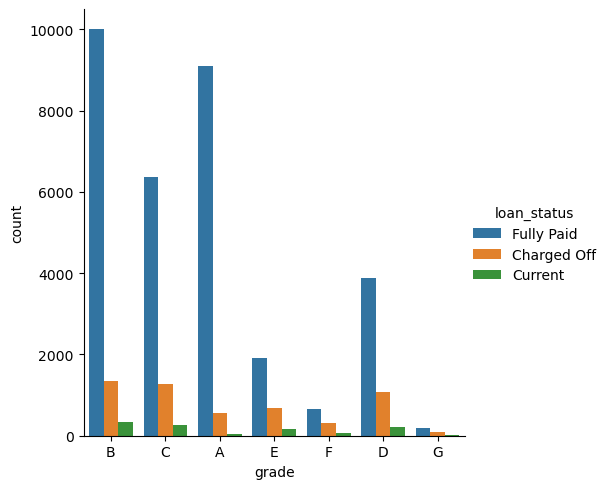

In [256]:
# 10. Using the bar plot visualize the loan_status column against categorical
# column grade, term, verification_status . Write the observation from each graph.

import seaborn as sns
import matplotlib.pyplot as plt
sns.catplot(x='grade', hue='loan_status', data=df, kind='count')
plt.show()

#Observations
1.The graph shows the distribution of loan status for each loan grade. The majority of loans are in the 'A' and 'B' grades, and these loans have a higher proportion of 'Fully Paid' loan status compared to 'Charged Off' or 'Current' status. As the grade decreases, the proportion of loans with 'Charged Off' status increases.

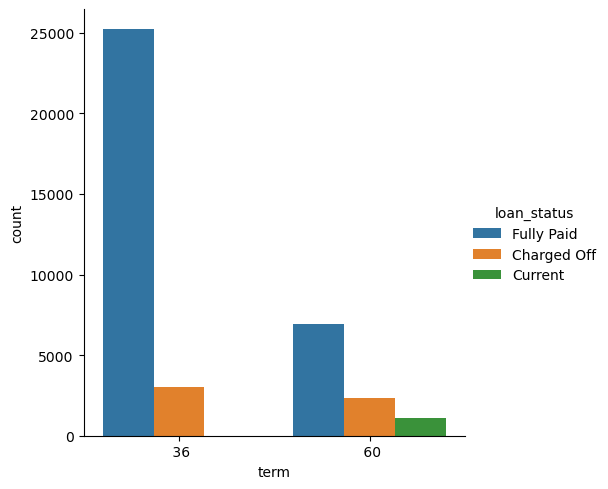

In [257]:
sns.catplot(x='term', hue='loan_status', data=df, kind='count')
plt.show()

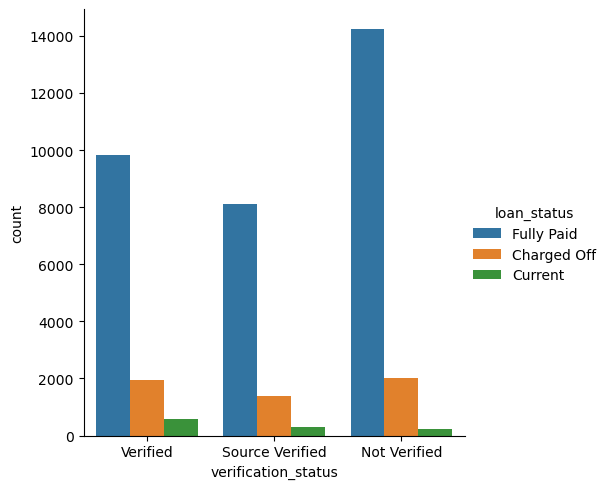

In [258]:
sns.catplot(x='verification_status', hue='loan_status', data=df, kind='count')
plt.show()

In [259]:
#11.Using a user defined function convert the ‘emp_len’ column into
#categorical column as follows -
#If emp_len is less than equals to 1 then recode as ‘fresher’.
#If emp_len is greater than 1 and less than 3 then recode as ‘junior’.
#If emp_len is greater than 3 and less than 7 then recode as ‘senior’
#If emp_len is greater than 7 then recode as ‘expert’.

def conv(x):
    if x <= 1:
        x = 'fresher'
    elif x > 1 and x< 3:
        x = 'junior'
    elif x >= 3  and x < 7:
        x = 'senior'
    else:
        x = 'expert'
        
    return x

df.emp_length = df.emp_length.apply(conv)
        

In [260]:
df.emp_length.value_counts()

expert     13373
senior     13017
fresher     7804
junior      4382
Name: emp_length, dtype: int64

In [261]:
# 12.Find the sum of ‘loan_amnt’ for each grade and display the distribution
# of ‘loan_amnt’ using a pie plot.

df.head(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,...,loan_status,purpose,dti,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,risky_loan_applicant
0,1077501,1296599,5000,5000,4975.0,36,10.65,162.87,B,expert,...,Fully Paid,credit_card,27.65,5863.155187,5833.84,5000.00,863.16,Jan-15,171.62,0
1,1077430,1314167,2500,2500,2500.0,60,15.27,59.83,C,fresher,...,Charged Off,car,1.00,1008.710000,1008.71,456.46,435.17,Apr-13,119.66,0


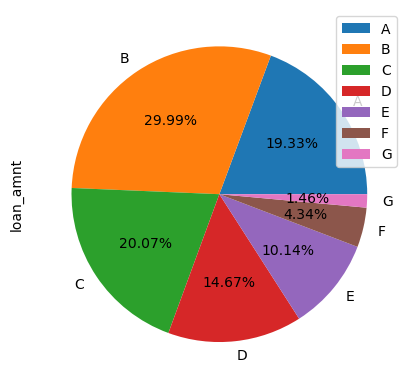

In [271]:
df.groupby(['grade'])['loan_amnt'].sum().plot(kind = 'pie',autopct = '%.2f%%',legend =True)
plt.show()

                                            Gracias